In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Saving yom.jpg to yom.jpg


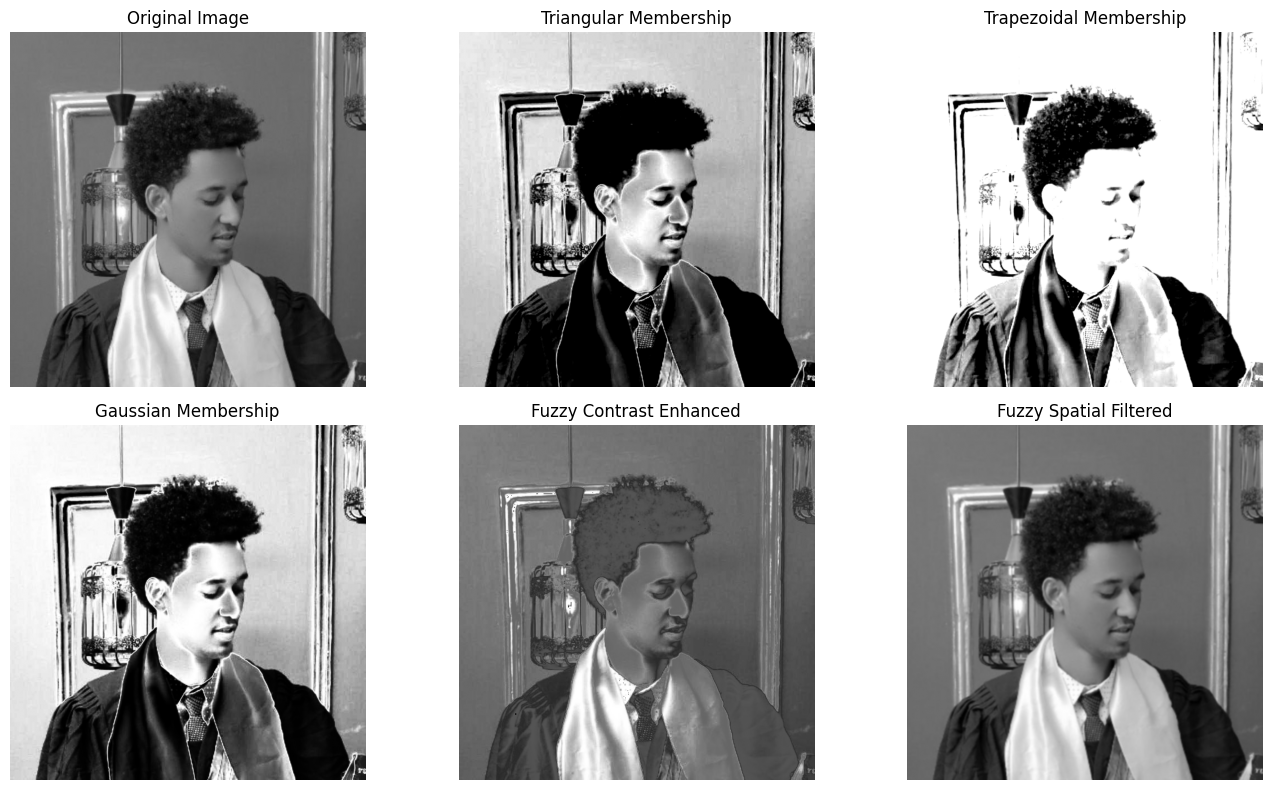

In [ ]:
# -*- coding: utf-8 -*-
"""Untitled0.ipynb

Automatically generated by Colab.

Originally located at
    https://colab.research.google.com/drive/1iduCY5ZVcZEyWIEUfMd2ix1B1opfhfBc
"""

from google.colab import files
uploaded = files.upload()

# =========================================================
# FUZZY IMAGE PROCESSING PROJECT
# Intensity Transformations & Spatial Filtering
# =========================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. LOAD IMAGE
# ---------------------------------------------------------
def load_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found. Check file path.")
    return img / 255.0   # normalize to [0,1]


# ---------------------------------------------------------
# 2. MEMBERSHIP FUNCTIONS
# ---------------------------------------------------------
def triangular_mf(x, a, b, c):
    return np.maximum(0, np.minimum((x - a) / (b - a + 1e-6),
                                    (c - x) / (c - b + 1e-6)))

def trapezoidal_mf(x, a, b, c, d):
    return np.maximum(0, np.minimum(np.minimum((x - a)/(b - a + 1e-6), 1),
                                    (d - x)/(d - c + 1e-6)))

def gaussian_mf(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))


# ---------------------------------------------------------
# 3. MEMBERSHIP TRANSFORMATIONS
# ---------------------------------------------------------
def triangular_membership_transform(image):
    return triangular_mf(image, 0.2, 0.5, 0.8)

def trapezoidal_membership_transform(image):
    return trapezoidal_mf(image, 0.1, 0.3, 0.7, 0.9)

def gaussian_membership_transform(image):
    return gaussian_mf(image, 0.5, 0.15)


# ---------------------------------------------------------
# 4. FUZZY INTENSIFICATION OPERATOR
# ---------------------------------------------------------
def intensify(mu):
    out = np.zeros_like(mu)
    low = mu <= 0.5
    high = mu > 0.5

    out[low] = 2 * mu[low] ** 2
    out[high] = 1 - 2 * (1 - mu[high]) ** 2
    return out


# ---------------------------------------------------------
# 5. FUZZY CONTRAST ENHANCEMENT
# ---------------------------------------------------------
def fuzzy_contrast(image):
    dark = triangular_mf(image, 0.0, 0.0, 0.5)
    gray = triangular_mf(image, 0.25, 0.5, 0.75)
    bright = triangular_mf(image, 0.5, 1.0, 1.0)

    dark_i = intensify(dark)
    bright_i = intensify(bright)

    enhanced = 0.3 * dark_i + 0.5 * gray + 0.9 * bright_i
    return np.clip(enhanced, 0, 1)


# ---------------------------------------------------------
# 6. FUZZY SPATIAL FILTER
# ---------------------------------------------------------
def fuzzy_mean_filter(image):
    padded = np.pad(image, 1, mode='edge')
    filtered = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded[i:i+3, j:j+3]
            center = image[i, j]

            similarity = 1 - np.abs(window - center)
            filtered[i, j] = np.sum(window * similarity) / np.sum(similarity)

    return filtered


# ---------------------------------------------------------
# 7. DISPLAY RESULTS
# ---------------------------------------------------------
def show_results(original, tri, trap, gauss, contrast, filtered):
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(tri, cmap='gray')
    plt.title("Triangular Membership")
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(trap, cmap='gray')
    plt.title("Trapezoidal Membership")
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(gauss, cmap='gray')
    plt.title("Gaussian Membership")
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(contrast, cmap='gray')
    plt.title("Fuzzy Contrast Enhanced")
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(filtered, cmap='gray')
    plt.title("Fuzzy Spatial Filtered")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


# ---------------------------------------------------------
# 8. MAIN EXECUTION
# ---------------------------------------------------------
if __name__ == "__main__":
    image_path = list(uploaded.keys())[0] # Changed to use the uploaded file name

    image = load_image(image_path)

    tri_img = triangular_membership_transform(image)
    trap_img = trapezoidal_membership_transform(image)
    gauss_img = gaussian_membership_transform(image)

    contrast_img = fuzzy_contrast(image)
    filtered_img = fuzzy_mean_filter(image)

    show_results(image, tri_img, trap_img, gauss_img, contrast_img, filtered_img)